In [3]:
#%pip install pandas
#%pip install numpy
#%pip install matplotlib
#%pip install seaborn
#%pip install hypertools
#%pip install scikit-learn
#%pip install tensorflow
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import hypertools as hyp 
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib
from matplotlib import pyplot as plt
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

%matplotlib inline

pd.set_option('display.max_columns', 100)

c:\Users\Tetas\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df= pd.read_csv('./data/wdbc.data',  index_col= None, na_values='?')
df.head(6)

,id,diagnostico,raio_med,textura_med,perimetro_med,area_med,suavidade_med,compacidade_med,concavidade_med,pontos concavos_med,simetria_med,dimensao fractal_med,raio_ep,textura_ep,perimetro_ep,area_ep,suavidade_ep,compacidade_ep,concavidade_ep,pontos concavos_ep,simetria_ep,dimensao fractal_ep,raio_pior,textura_pior,perimetro_pior,area_pior,suavidade_pior,compacidade_pior,concavidade_pior,pontos concavos_pior,simetria_pior,dimensao fractal_pior
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


# Data Preprocessing

In [5]:
df.shape

(569, 32)

In [ ]:
df.isnull().sum()

In [6]:
df.drop('Unnamed: 32', axis=1 , inplace=True)
df.shape

KeyError: "['Unnamed: 32'] not found in axis"

In [ ]:
df.drop('id', axis=1 , inplace=True)
df.shape

In [7]:
df["diagnostico"].value_counts()


diagnostico
B    357
M    212
Name: count, dtype: int64

# Feature Selection

In [8]:
def categorical_to_numeric_diagnostico(x):
    if x=='M':
        return 1
    if x=='B':
        return 0

df['diagnostico']= df['diagnostico'].apply(categorical_to_numeric_diagnostico)
df["diagnostico"].value_counts()

diagnostico
0    357
1    212
Name: count, dtype: int64

<Axes: >

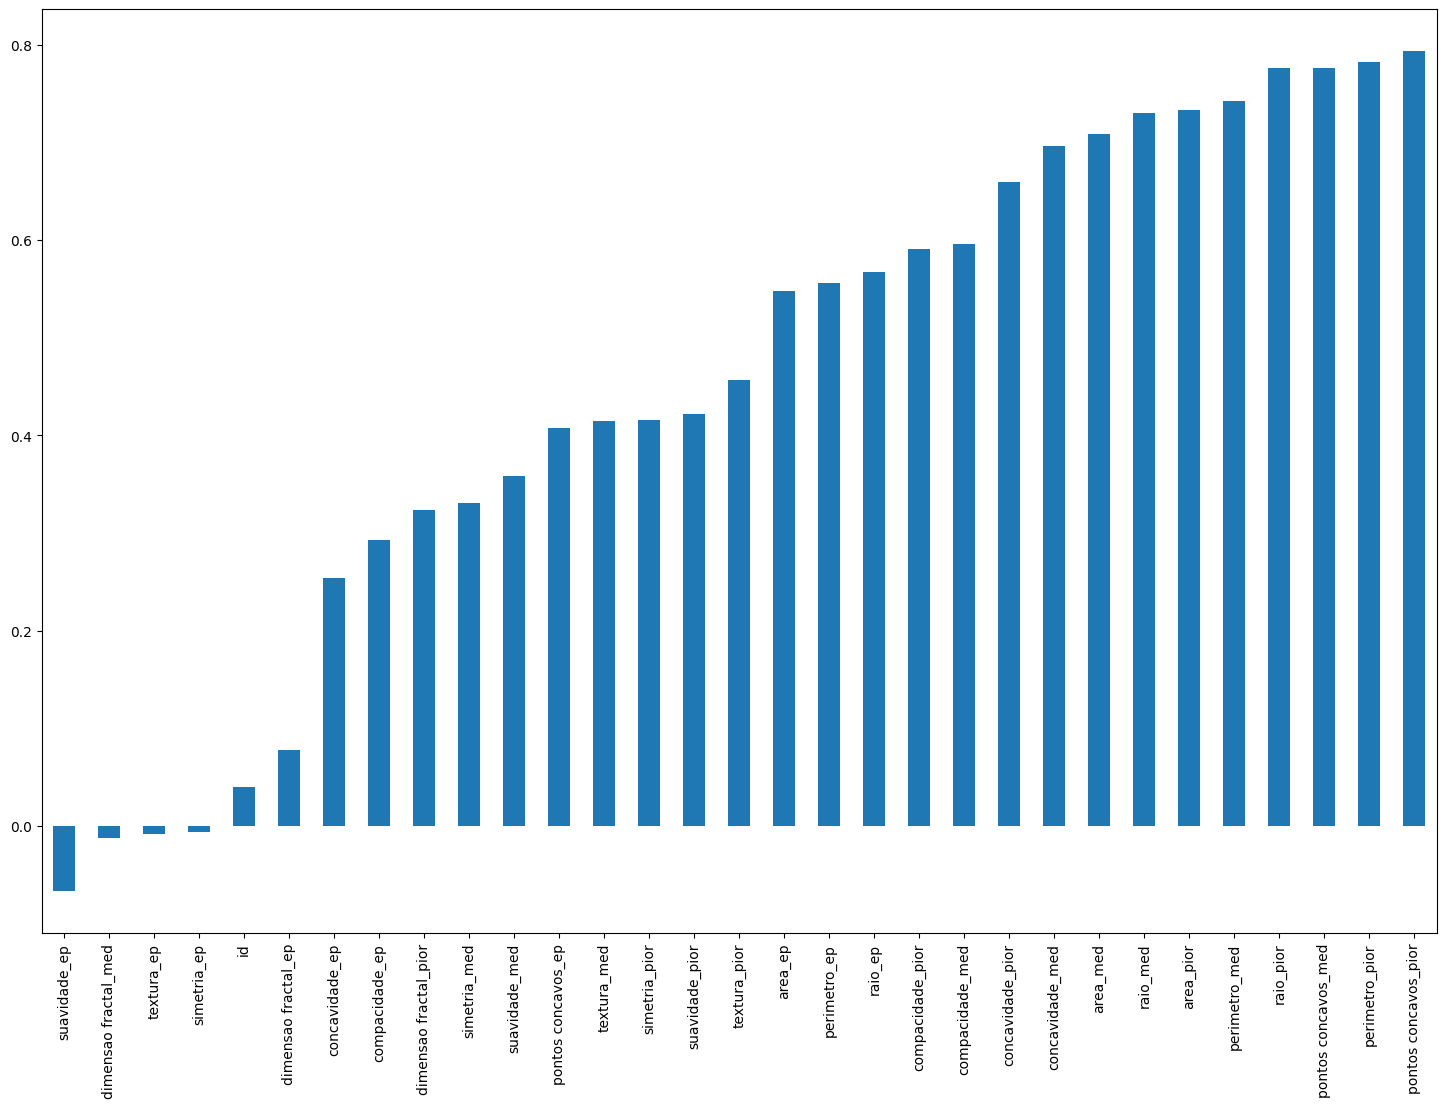

In [18]:
#Observe correlation to the diagnostico
f, ax = plt.subplots(figsize=(18, 12))
tst = df.corr()['diagnostico'].copy()
tst = tst.drop('diagnostico')
tst.sort_values(inplace=True)
tst.plot(kind="bar", alpha=1)

In [19]:
#The features looks like they are broken into three main categories, value means, standard deivations, and 'worst'. We can check to see if there are any correlations between these subsets of features
features_mean = df.columns[1:9]
features_se = df.columns[9:19]
features_worst = df.columns[19:]

In [20]:
#Correlation between sets of features
corr = df[features_se].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = features_mean, size = 15)
g.set_yticklabels(rotation=0, labels = features_mean, size = 15)
g.set_xticks(np.arange(.5,10.5,1))
plt.rcParams["figure.figsize"] = (17,17)

NameError: name 'sns' is not defined

In [ ]:
corr = df[features_se].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = features_se, size = 15)
g.set_yticklabels(rotation=0, labels = features_se, size = 15)
g.set_xticks(np.arange(.5,10.5,1))
plt.rcParams["figure.figsize"] = (17,17)

In [ ]:
corr = df[features_worst].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(      rotation=90, labels = features_worst, size = 15)
g.set_yticklabels(rotation=0, labels = features_worst, size = 15)
g.set_xticks(np.arange(.5,10.5,1))
plt.rcParams["figure.figsize"] = (17,17)

In [ ]:
#Correlation Table
corr = df.corr()
corr = (corr)

corr

In [ ]:
#Correlation Matrix

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
plt.title('Pearson Correlation of Mushroom Features')
# Draw the heatmap using seaborn
sns.heatmap(df.astype(float).corr(),linewidths=0.7,vmax=1.0, square=True, annot=True)